# **World Bank Social Development Dataset:** *Visualizations*
### Source: [World Bank Social Development](https://data.worldbank.org/topic/social-development?view=chart)

#### Our questions:
<ol>
<li>How do the indicators differ in countries, especially in those that are labeled as low income?</li>
<li>What is the labor force participation rate per region?</li>
<li>What is the labor force participation rate per income group?</li>
<li>What does the division of labor look like when women participate more in governmental positions?</li>
</ol>

In [54]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up code
data = pd.read_csv('data/data-cleaned.csv')
countries = data[data['Region'] != 'N/A']
regions = data[data['Region'] == 'N/A']

# Make sure data imported correctly
print(data.head())

   Unnamed: 0 Country                                          Indicator  \
0           0   Aruba             Life expectancy at birth, male (years)   
1           1   Aruba           Life expectancy at birth, female (years)   
2           2   Aruba  Adolescent fertility rate (births per 1,000 wo...   
3           3   Aruba  Refugee population by country or territory of ...   
4           4   Aruba  Refugee population by country or territory of ...   

                      Region  IncomeGroup  Year     Value  
0  Latin America & Caribbean  High income  1960   64.0840  
1  Latin America & Caribbean  High income  1960   67.1290  
2  Latin America & Caribbean  High income  1960  106.2062  
3  Latin America & Caribbean  High income  1960       NaN  
4  Latin America & Caribbean  High income  1960       NaN  


In [55]:
print(data['Indicator'].unique())

['Life expectancy at birth, male (years)'
 'Life expectancy at birth, female (years)'
 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
 'Refugee population by country or territory of origin'
 'Refugee population by country or territory of asylum'
 'Unemployment, male (% of male labor force) (modeled ILO estimate)'
 'Unemployment, female (% of female labor force) (modeled ILO estimate)'
 'Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)'
 'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)'
 'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)'
 'Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)'
 'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)'
 'Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)'
 'Labor force partici

### Visualizations

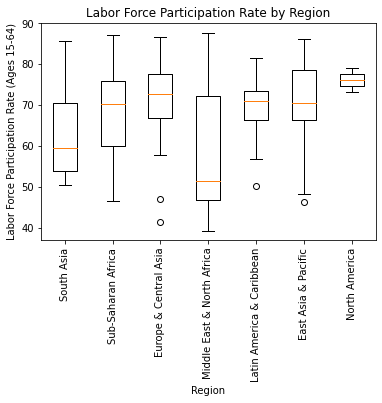

In [56]:
# Box and whiskers chart for labor participation rate by region income
labor_participation = countries[countries['Indicator'] == r'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)']

# Include only one year
labor_participation = labor_participation.loc[countries['Year'] == 2019]

# Exclude nan
labor_participation = labor_participation.loc[labor_participation['Region'].notna()]
labor_participation = labor_participation.loc[labor_participation['Value'].notna()]

# Break down by regions
labor_participation = labor_participation[['Region', 'Value']]
labor_values = []
labels = labor_participation['Region'].unique()
for region in labels:
    labor_values.append(labor_participation[labor_participation['Region'] == region]['Value'])

# Plot in box and whiskers plot
plt.boxplot(labor_values, labels=labels)
plt.xticks(rotation=90)
plt.title('Labor Force Participation Rate by Region')
plt.xlabel('Region')
plt.ylabel('Labor Force Participation Rate (Ages 15-64)')
plt.show()

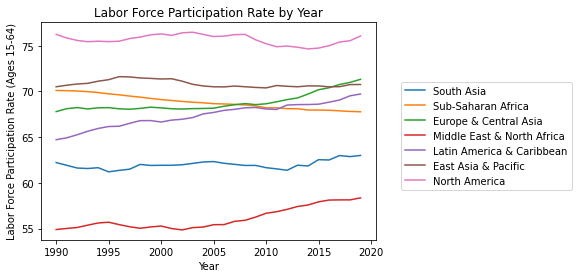

In [71]:
# Box and whiskers chart for labor participation rate by region income
labor_participation = countries[countries['Indicator'] == r'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)']

# Exclude nan
labor_participation = labor_participation.loc[labor_participation['Region'].notna()]
labor_participation = labor_participation.loc[labor_participation['Value'].notna()]

# Break down by regions
labor_participation = labor_participation[['Region', 'Value', 'Year']]
values = []
years = labor_participation['Year'].unique()
regions = labor_participation['Region'].unique()
for region in regions:
    this_region = []
    for year in years:
        curr = labor_participation.loc[labor_participation['Region'] == region]
        curr = curr.loc[labor_participation['Year'] == year]
        avg = curr['Value'].mean()
        this_region.append(avg)
    values.append(this_region)

# Plot in box and whiskers plot
for i in range(len(regions)):
    plt.plot(years, values[i])
plt.legend(regions, bbox_to_anchor=(1.6, 0.75))
plt.title('Labor Force Participation Rate by Year')
plt.xlabel('Year')
plt.ylabel('Labor Force Participation Rate (Ages 15-64)')
plt.show()


Text(0.5, 1.0, 'Young Adult vs Population Labor Participation Rate')

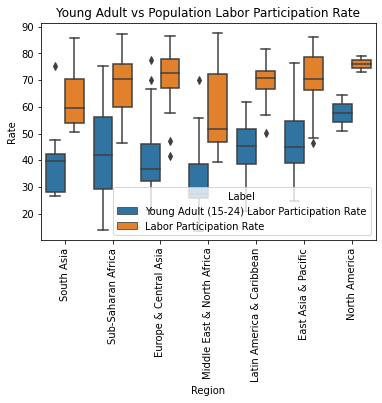

In [100]:
# Root bar: (1) rate of working youth; and (2) rate of working general

# Get literacy and labor data
region_young = countries[countries['Indicator'] == r'Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)']
region_labor = countries[countries['Indicator'] == r'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)']

# Exclude nan
region_young = region_young.loc[region_young['Region'].notna()]
region_young = region_young.loc[region_young['Value'].notna()]
region_labor = region_labor.loc[region_labor['Region'].notna()]
region_labor = region_labor.loc[region_labor['Value'].notna()]

# Specify Year
region_young = region_young[region_young['Year'] == 2019]
region_labor = region_labor[region_labor['Year'] == 2019]

# Plot as grouped box-and-whiskers plots
region_young = region_young[['Region', 'Value']]
region_labor = region_labor[['Region', 'Value']]
region_young['Label'] = 'Young Adult (15-24) Labor Participation Rate'
region_labor['Label'] = 'Labor Participation Rate'
values = [region_young, region_labor]
combo = pd.concat(values)

p = sns.boxplot(x = combo['Region'],
            y = combo['Value'],
            hue = combo['Label'])
p.set_ylabel('Rate')
p.tick_params(axis='x', rotation=90)
p.set_title('Young Adult vs Population Labor Participation Rate')

Text(0.5, 1.0, 'Young Adult vs Population Labor Participation Rate')

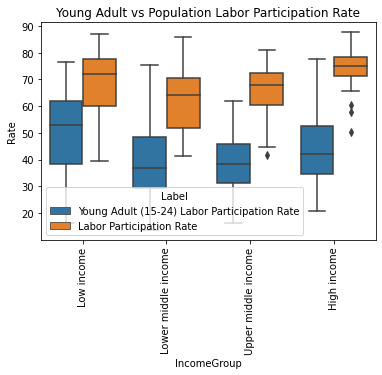

In [104]:
# Root bar: (1) rate of working youth; and (2) rate of working general (wealth based)

# Get literacy and labor data
IncomeGroup_young = countries[countries['Indicator'] == r'Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)']
IncomeGroup_labor = countries[countries['Indicator'] == r'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)']

# Exclude nan
IncomeGroup_young = IncomeGroup_young.loc[IncomeGroup_young['IncomeGroup'].notna()]
IncomeGroup_young = IncomeGroup_young.loc[IncomeGroup_young['Value'].notna()]
IncomeGroup_labor = IncomeGroup_labor.loc[IncomeGroup_labor['IncomeGroup'].notna()]
IncomeGroup_labor = IncomeGroup_labor.loc[IncomeGroup_labor['Value'].notna()]

# Specify Year
IncomeGroup_young = IncomeGroup_young[IncomeGroup_young['Year'] == 2019]
IncomeGroup_labor = IncomeGroup_labor[IncomeGroup_labor['Year'] == 2019]

# Plot as grouped box-and-whiskers plots
IncomeGroup_young = IncomeGroup_young[['IncomeGroup', 'Value']]
IncomeGroup_labor = IncomeGroup_labor[['IncomeGroup', 'Value']]
IncomeGroup_young['Label'] = 'Young Adult (15-24) Labor Participation Rate'
IncomeGroup_labor['Label'] = 'Labor Participation Rate'
values = [IncomeGroup_young, IncomeGroup_labor]
combo = pd.concat(values)

p = sns.boxplot(x = combo['IncomeGroup'],
            y = combo['Value'],
            hue = combo['Label'])
p.set_ylabel('Rate')
p.tick_params(axis='x', rotation=90)
p.set_title('Young Adult vs Population Labor Participation Rate')

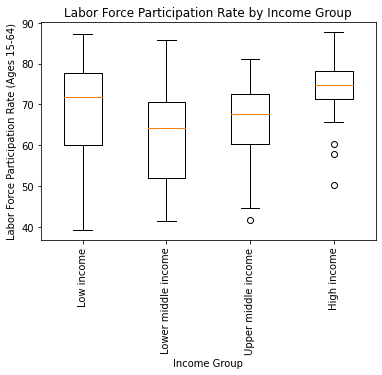

In [101]:
# Box and whiskers chart for labor participation rate by country income
labor_participation = countries[countries['Indicator'] == r'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)']

# Include only one year
labor_participation = labor_participation.loc[countries['Year'] == 2019]

# Exclude nan
labor_participation = labor_participation.loc[labor_participation['IncomeGroup'].notna()]
labor_participation = labor_participation.loc[labor_participation['Value'].notna()]

# Break down by IncomeGroups
labor_participation = labor_participation[['IncomeGroup', 'Value']]
labor_values = []
labels = labor_participation['IncomeGroup'].unique()
for IncomeGroup in labels:
    labor_values.append(labor_participation[labor_participation['IncomeGroup'] == IncomeGroup]['Value'])

# Plot in box and whiskers plot
plt.boxplot(labor_values, labels=labels)
plt.xticks(rotation=90)
plt.title('Labor Force Participation Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Labor Force Participation Rate (Ages 15-64)')
plt.show()

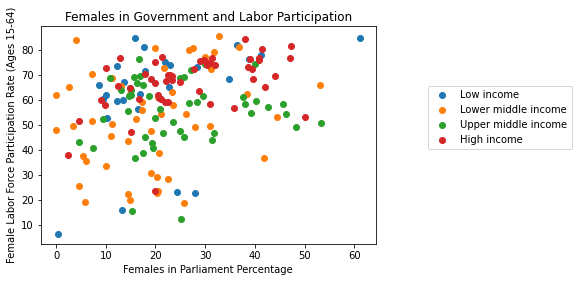

In [127]:
# Scatterplot
female_labor = countries[countries['Indicator'] == r'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)']
female_government = countries[countries['Indicator'] == r'Proportion of seats held by women in national parliaments (%)']

# Include only one year
female_labor = female_labor.loc[female_labor['Year'] == 2019]
female_government = female_government.loc[female_government['Year'] == 2019]

# Include only essentials
female_labor = female_labor[['Country', 'Value', 'IncomeGroup']]
female_labor = female_labor.rename(columns={'Value': 'LaborParticipation'})
female_government = female_government[['Country', 'Value', 'IncomeGroup']]
female_government = female_government.rename(columns={'Value': 'FemaleGovernment'})

# Exclude nan
female_labor = female_labor.loc[female_labor['Country'].notna()]
female_labor = female_labor.loc[female_labor['LaborParticipation'].notna()]
female_labor = female_labor.loc[female_labor['IncomeGroup'].notna()]
female_government = female_government.loc[female_government['Country'].notna()]
female_government = female_government.loc[female_government['FemaleGovernment'].notna()]
female_government = female_government.loc[female_government['IncomeGroup'].notna()]

# Merge based on country
combo = female_government.merge(female_labor, how='inner', on='Country')
combo = combo.rename(columns={'IncomeGroup_x': 'IncomeGroup'})

# Make scatterpplot
IncomeGroups = combo['IncomeGroup'].unique()
for group in IncomeGroups:
    this_combo = combo[combo['IncomeGroup'] == group]
    plt.scatter(this_combo['FemaleGovernment'], this_combo['LaborParticipation'])
plt.legend(IncomeGroups, bbox_to_anchor=(1.6, 0.75))
plt.title('Females in Government and Labor Participation')
plt.xlabel('Females in Parliament Percentage')
plt.ylabel('Female Labor Force Participation Rate (Ages 15-64)')
plt.show()